In [2]:

import os
from ultralytics import YOLO
import torch
local_dev =  "/workspace/BYU/notebooks" if "WANDB_API_KEY" in os.environ else "C:/Users/Freedomkwok2022/ML_Learn/BYU/notebooks"
yolo_dataset_dir = os.path.join(local_dev, 'yolo_dataset')
yolo_weights_dir = os.path.join(local_dev, 'yolo_weights' , "other")

img = torch.rand(1, 3, 640, 640)

bestpt = os.path.join(yolo_weights_dir, "best.pt")
# 48,691,139
# model = YOLO(efficientnet_b5_yolo_config_path, verbose=False)
ckpt = torch.load(bestpt, map_location='cpu')
print(ckpt.keys())

dict_keys(['date', 'version', 'license', 'docs', 'epoch', 'best_fitness', 'model', 'ema', 'updates', 'optimizer', 'train_args', 'train_metrics', 'train_results'])


In [4]:
ckpt.get('train_args')

{'task': 'detect',
 'mode': 'train',
 'model': '../input/yolov8l.pt',
 'data': './fixed_dataset0.yaml',
 'epochs': 30,
 'time': None,
 'patience': 10,
 'batch': 32,
 'imgsz': 960,
 'save': True,
 'save_period': 1,
 'cache': False,
 'device': None,
 'workers': 4,
 'project': './yolo_weights14',
 'name': 'motor_detector',
 'exist_ok': True,
 'pretrained': True,
 'optimizer': 'AdamW',
 'verbose': True,
 'seed': 0,
 'deterministic': True,
 'single_cls': False,
 'rect': False,
 'cos_lr': True,
 'close_mosaic': 0,
 'resume': False,
 'amp': True,
 'fraction': 1.0,
 'profile': False,
 'freeze': None,
 'multi_scale': False,
 'overlap_mask': True,
 'mask_ratio': 4,
 'dropout': 0.0,
 'val': True,
 'split': 'val',
 'save_json': False,
 'conf': None,
 'iou': 0.7,
 'max_det': 300,
 'half': False,
 'dnn': False,
 'plots': True,
 'source': None,
 'vid_stride': 1,
 'stream_buffer': False,
 'visualize': False,
 'augment': True,
 'agnostic_nms': False,
 'classes': None,
 'retina_masks': False,
 'embed': 

In [15]:
import timm
import torch
from PIL import Image
from torchvision import transforms
import os
from pathlib import Path
import os
from ultralytics import YOLO
import torch

local_dev =  "/workspace/BYU/notebooks" if "WANDB_API_KEY" in os.environ else "C:/Users/Freedomkwok2022/ML_Learn/BYU/notebooks"
img_path = os.path.join(Path(local_dev).parent, "yolo_dataset", "images", "shared_010_scaled", "train", "BYU_007_100_tomo_0c3a99_z0121_y0651_x0211_w0928_h0959_r100.jpg")
yolo_dataset_dir = os.path.join(local_dev, 'yolo_dataset')
yolo_weights_dir = os.path.join(local_dev, 'yolo_weights' , "other")

bestpt = os.path.join(yolo_weights_dir, "best2.pt")
model = YOLO(bestpt, verbose=False)
def get_feature_map(model):
    features = {}
    def make_hook(name):
        def hook(module, input, output):
            features[name] = output
        return hook
    model.model.model[16].register_forward_hook(make_hook("bifpn"))
    return features

features = get_feature_map(model)
results = model([img_path, img_path], imgsz=960, verbose=False)

In [25]:
features["bifpn"]

tensor([[[[ 2.5149e+00, -5.2976e-02,  4.4338e-01,  ...,  9.4593e-02,  1.3799e-01,  1.1849e+00],
          [ 2.4983e+00,  4.7913e-02,  3.5530e-01,  ..., -1.5731e-01,  1.5901e-01,  1.2681e+00],
          [ 1.6985e+00, -2.2460e-02,  8.5002e-02,  ..., -1.9561e-01,  4.4353e-01,  1.3401e+00],
          ...,
          [ 8.7217e-01, -1.9180e-01, -9.5954e-02,  ..., -2.0707e-01,  9.9301e-02,  2.0876e+00],
          [ 2.0792e+00,  2.8877e-01,  6.0067e-01,  ...,  4.8237e-01,  1.0561e+00,  2.1103e+00],
          [ 2.8372e+00,  1.3019e-01,  6.8348e-01,  ...,  1.4067e+00,  1.2307e+00,  2.4490e+00]],

         [[ 3.2078e-01,  4.8939e-01,  4.8923e-01,  ...,  8.5457e-01,  5.2573e-01,  4.1917e-01],
          [ 4.4836e-01,  5.3857e-01,  4.5170e-01,  ...,  1.0471e+00,  6.2924e-01,  4.7543e-01],
          [ 8.5545e-01,  9.3007e-01,  9.2104e-01,  ...,  1.5658e+00,  9.2921e-01,  6.0692e-01],
          ...,
          [ 9.0429e-01,  9.3789e-01,  1.1644e+00,  ...,  1.4786e+00,  7.8388e-01,  4.3098e-01],
        

In [24]:
import numpy as np 
all_features_bifpn = []
for i in features["bifpn"].cpu().numpy():
    print(type(i), type(features["bifpn"].cpu().numpy()), i.shape, features["bifpn"].cpu().numpy().shape)
    all_features_bifpn.append(i)
    
print(type(all_features_bifpn))
result2 = np.concatenate(all_features_bifpn, axis=0)
print(type(result2), result2.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> (256, 120, 120) (2, 256, 120, 120)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> (256, 120, 120) (2, 256, 120, 120)
<class 'list'>
<class 'numpy.ndarray'> (512, 120, 120)


In [36]:
cpu_data[0][0].shape

(120, 120)

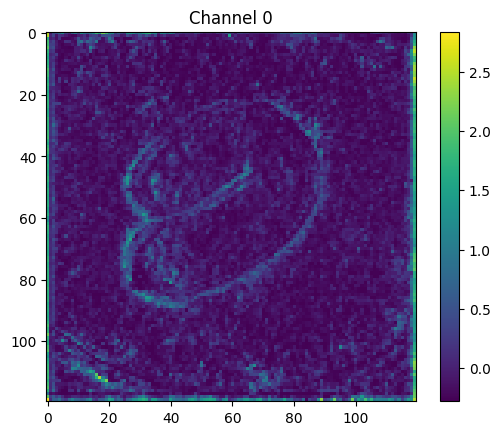

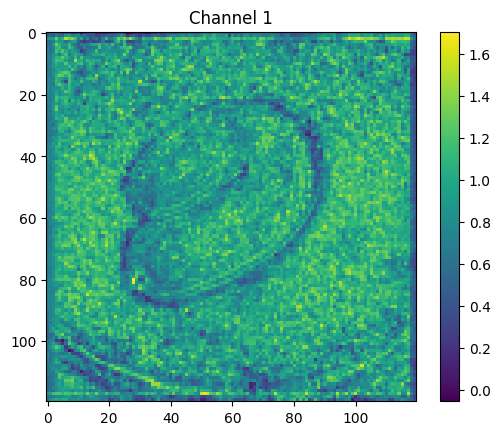

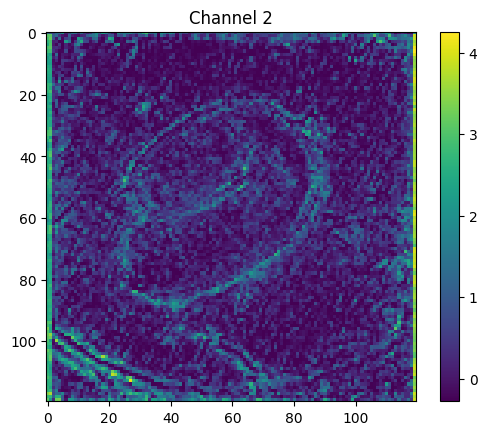

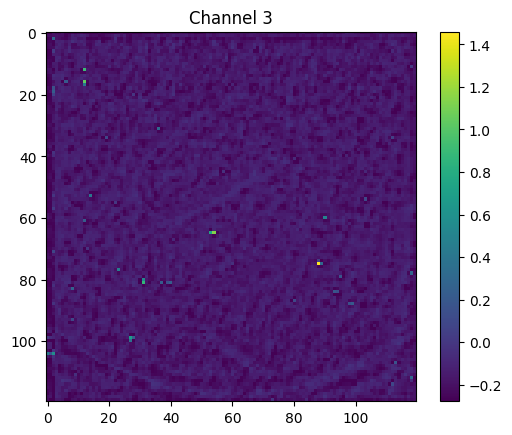

In [37]:
import matplotlib.pyplot as plt
cpu_data = features["bifpn"].cpu().numpy()
# Visualize the first 4 channels
for i in range(4):
    plt.imshow(cpu_data[0][i], cmap='viridis')
    plt.title(f"Channel {i}")
    plt.colorbar()
    plt.show()

In [43]:
radius=30
def uniform_ball(n):
        vec = np.random.randn(n, 3)
        vec /= np.linalg.norm(vec, axis=1, keepdims=True)
        r = np.random.rand(n) ** (1/3)
        print(r.shape)
        return vec * (r[:, None] * radius)
samples = uniform_ball(20)    

(20,)


In [45]:
X, Y, Z = (960, 960, 300)
candidates = samples + np.array([100, 120, 3])
mask = (
            (candidates[:, 0] >= 0) & (candidates[:, 0] < Z) &
            (candidates[:, 1] >= 0) & (candidates[:, 1] < Y) &
            (candidates[:, 2] >= 0) & (candidates[:, 2] < X)
        )
mask

array([False,  True,  True, False,  True, False, False, False,  True,  True,  True,  True,  True, False, False, False, False, False,  True, False])

In [46]:
candidates[mask]

array([[     96.835,      133.43,      20.633],
       [     92.874,      132.32,      7.7889],
       [     82.549,       112.2,      19.935],
       [     109.55,      110.03,      8.3568],
       [     123.32,      110.23,      17.849],
       [     89.643,      116.98,      28.179],
       [     99.814,      130.74,      7.0596],
       [     111.75,      106.79,      6.3852],
       [     92.421,       114.4,      17.456]])

In [48]:
feat = features["bifpn"].cpu().numpy()
feat.shape

(2, 256, 120, 120)

In [49]:
fd, fh, fw = feat.shape[0], feat.shape[2], feat.shape[3]
fd, fh, fw

(2, 120, 120)

In [7]:
bestpt = os.path.join(yolo_weights_dir, "best2.pt")
# 48,691,139
# model = YOLO(efficientnet_b5_yolo_config_path, verbose=False)
ckpt = torch.load(bestpt, map_location='cpu')
ckpt.get('train_args')

{'task': 'detect',
 'mode': 'train',
 'model': '../input/yolo11l.pt',
 'data': './fixed_dataset.yaml',
 'epochs': 30,
 'time': None,
 'patience': 10,
 'batch': 32,
 'imgsz': 960,
 'save': True,
 'save_period': 1,
 'cache': False,
 'device': None,
 'workers': 4,
 'project': './yolo_weights',
 'name': 'motor_detector',
 'exist_ok': True,
 'pretrained': True,
 'optimizer': 'AdamW',
 'verbose': True,
 'seed': 0,
 'deterministic': True,
 'single_cls': False,
 'rect': False,
 'cos_lr': True,
 'close_mosaic': 0,
 'resume': False,
 'amp': True,
 'fraction': 1.0,
 'profile': False,
 'freeze': None,
 'multi_scale': False,
 'overlap_mask': True,
 'mask_ratio': 4,
 'dropout': 0.0,
 'val': True,
 'split': 'val',
 'save_json': False,
 'conf': None,
 'iou': 0.7,
 'max_det': 300,
 'half': False,
 'dnn': False,
 'plots': True,
 'source': None,
 'vid_stride': 1,
 'stream_buffer': False,
 'visualize': False,
 'augment': True,
 'agnostic_nms': False,
 'classes': None,
 'retina_masks': False,
 'embed': Non

In [14]:
960 * 0.025

24.0

In [8]:
bestpt = os.path.join(yolo_weights_dir, "epoch6_optimized.pt")
# 48,691,139
# model = YOLO(efficientnet_b5_yolo_config_path, verbose=False)
ckpt = torch.load(bestpt, map_location='cpu')
ckpt.get('train_args')

{'task': 'detect',
 'mode': 'train',
 'model': '../input/yolo11l.pt',
 'data': './fixed_dataset.yaml',
 'epochs': 30,
 'time': None,
 'patience': 10,
 'batch': 32,
 'imgsz': 960,
 'save': True,
 'save_period': 1,
 'cache': False,
 'device': None,
 'workers': 4,
 'project': './yolo_weights',
 'name': 'motor_detector',
 'exist_ok': True,
 'pretrained': True,
 'optimizer': 'AdamW',
 'verbose': True,
 'seed': 0,
 'deterministic': True,
 'single_cls': False,
 'rect': False,
 'cos_lr': True,
 'close_mosaic': 0,
 'resume': False,
 'amp': True,
 'fraction': 1.0,
 'profile': False,
 'freeze': None,
 'multi_scale': False,
 'overlap_mask': True,
 'mask_ratio': 4,
 'dropout': 0.0,
 'val': True,
 'split': 'val',
 'save_json': False,
 'conf': None,
 'iou': 0.7,
 'max_det': 300,
 'half': False,
 'dnn': False,
 'plots': True,
 'source': None,
 'vid_stride': 1,
 'stream_buffer': False,
 'visualize': False,
 'augment': True,
 'agnostic_nms': False,
 'classes': None,
 'retina_masks': False,
 'embed': Non

In [1]:
import torch
torch.__version__

'2.5.1+cu121'

In [4]:
! pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.5.1+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu121.html


In [5]:
from torch_cluster import knn_graph
import torch
from torch_cluster import knn_graph

# Volume size
X, Y, Z = 960, 960, 300
num_points = 20
k = 5  # Number of neighbors for k-NN graph

# Step 1: Generate 20 random points within (Z, Y, X)
points = torch.stack([
    torch.randint(low=0, high=Z, size=(num_points,)),
    torch.randint(low=0, high=Y, size=(num_points,)),
    torch.randint(low=0, high=X, size=(num_points,))
], dim=1).float()  # shape: (20, 3)

print("Points shape:", points.shape)
print("Sample points:\n", points)

# Step 2: Build k-NN graph
edge_index = knn_graph(points, k=k, loop=False)

print("\nEdge Index shape:", edge_index.shape)
print("Edge connections:\n", edge_index)
edge_index_1 = knn_graph(points, k=12, loop=False)


Points shape: torch.Size([20, 3])
Sample points:
 tensor([[ 12., 538., 927.],
        [199., 877., 491.],
        [152., 501.,  24.],
        [ 96., 945., 641.],
        [224.,  94., 735.],
        [198., 802., 302.],
        [260., 758., 217.],
        [271., 236., 429.],
        [294., 130., 256.],
        [184., 543., 270.],
        [103., 218., 777.],
        [126., 672., 571.],
        [207., 307., 274.],
        [214., 839.,  77.],
        [ 94., 316., 618.],
        [268., 496., 331.],
        [119., 637., 102.],
        [ 54., 883., 762.],
        [222., 212., 570.],
        [ 90.,   4., 803.]])

Edge Index shape: torch.Size([2, 100])
Edge connections:
 tensor([[10, 17, 14, 11,  3,  3,  5, 11,  6, 17, 16,  9, 12, 15,  6, 17,  1, 11,
          5,  6, 19, 10, 18, 14,  7,  6,  1, 13,  9, 16,  5, 13, 16,  9, 15, 18,
         12,  8, 14, 15, 12,  7, 18, 15,  9, 15, 16,  6, 12,  2,  4, 14, 19, 18,
          0,  1,  3, 17,  5, 15,  7,  8, 15,  9, 18,  6, 16,  5,  2,  9, 18, 10,
      

In [17]:
edge_index_1

tensor([[10, 17, 14, 11,  3, 18,  4, 19,  1,  7, 15,  9,  3,  5, 11,  6, 17,  9,
         13, 15, 16,  0, 14,  2, 16,  9, 12, 15,  6, 13,  5,  8,  7, 11,  1, 18,
         17,  1, 11,  5,  6,  0,  9, 15, 13, 16, 14, 10, 19, 10, 18, 14,  7,  8,
         12,  0, 15, 11,  9, 17,  6,  1, 13,  9, 16, 11, 15,  3,  2, 17, 12,  7,
          5, 13, 16,  9, 15,  1,  2, 11, 12,  3,  7, 17, 18, 12,  8, 14, 15,  4,
          9, 10, 19, 11,  2, 16, 12,  7, 18, 15,  9, 14,  2,  4, 16, 10, 19,  6,
         15, 16,  6, 12,  2,  5, 11, 13,  7,  1, 14,  8,  4, 14, 19, 18,  0,  7,
         11, 12, 15,  8,  9, 17,  1,  3, 17,  5, 15,  9, 14,  6,  0, 18, 16, 12,
          7,  8, 15,  9, 18,  2, 14, 16,  6, 11,  5,  4,  6, 16,  5,  2,  9,  1,
         15, 11, 12,  3,  7, 17, 18, 10,  7,  4, 11, 12, 19, 15,  0,  9,  8,  1,
          9, 12,  7,  6, 16,  5,  2, 11, 18,  8, 14,  1,  2,  9,  6, 13,  5, 15,
         12,  1, 11,  7,  8, 14,  3, 11,  1,  0,  5, 14,  6,  9, 15, 10, 13, 16,
          7, 14,  4, 10, 12,